# 决策树

![overview](https://img.colabug.com/2018/03/0d5ea6c2dad759ffc951b06690d140e5.png)  

#### 符号说明  
设训练数据集为$D$,$|D|$表示其样本个数。设有$K$个类$C_k$，$k=1,2,\cdots,K,\ |C_k|$为属于类$C_k$的样本个数，$\sum_{k=1}^K|C_k|=|D|$.
设特征$A$有$n$个不同的取值$\{a_1,a_2,\cdots,a_n\}$，根据特征$A$的取值将$D$划分为$n$个子集$D_1,D_2,\cdots,D_n$，$|D_i|$为$D_i$的样本个数，
$\sum_{i=1}^n|D_i|=|D|$。记子集$D_i$中属于类$C_k$的样本的集合为$D_{ik}$，即$D_{ik}=D_i\cup C_k$，$|D_{ik}|$为$D_{ik}$的样本个数。

#### 算法5.1 信息增益的算法
输入：训练数据集$D$和特征$A$;  
输出：特征$A$对训练数据集$D$的信息增益$g(D,A)$.  
<br>
(1) 计算数据集$D$的经验熵$H(D)$  
$$H(D)=-\sum_{k=1}^K\frac{|C_k|}{|D|}log_2\frac{|C_k|}{|D|}$$  
(2) 计算特征$A$对数据集$D$的经验条件熵$H(D|A)$  
$$H(D|A)=\sum_{i=1}^n\frac{|D_i|}{|D|}H(D_i)=-\sum_{i=1}^n\frac{|D_i|}{|D|}\sum_{k=1}^K\frac{|D_ik|}{|D_i|}log_2\frac{|D_ik|}{|D_i|}$$  
(3) 计算信息增益  
$$g(D,A)=H(D)-H(D|A)$$

#### 例5.2 对下表数据，根据信息增益准则选择最优特征。  
**解** (1)计算经验熵$H(D)$，共两类，9是6否  
$$H(D)=-\frac{6}{15}log_2\frac{6}{15}-\frac{9}{15}log_2{9}{15}\approx0.971$$  
(2)计算各特征对数据集$D$的信息增益，分别以$A_1,A_2,A_3,A_4$表示年龄、有工作、有自己的房子和信贷情况4个特征，求最大信息增益  
$H(D)-H(D|A)$即求最小$H(D|A)$  
* $A_1:$取值共3种，每种占5个，即  
$$  
\begin{align}
H(D|A_1) &= \frac{5}{15}H(D_1)+\frac{5}{15}H(D_2)+\frac{5}{15}H(D_3)\\
&=\frac{1}{3}\big[\big( -\frac{2}{5}log_2\frac{2}{5}-\frac{3}{5}log_2\frac{3}{5}\big) +\big( -\frac{2}{5}log_2\frac{2}{5}-\frac{3}{5}log_2\frac{3}{5}\big)\\
&+\big(-\frac{1}{5}log_2\frac{1}{5}-\frac{4}{5}log_2\frac{4}{5}\big)\big] \approx\frac{1}{3}(0.971+0.971+0.722)\\
&\approx0.888
\end{align}
$$  
* $A_2:$取值共2种，每种各占5个和10个，即  
$$  
\begin{align}
H(D|A_2) &= \frac{5}{15}H(D_1)+\frac{10}{15}H(D_2)\\
&=\frac{1}{3}\big(-\frac{6}{6}log_2\frac{6}{6}\big)+\frac{2}{3}\big(-\frac{2}{5}log_2\frac{2}{5}-\frac{3}{5}log_2\frac{3}{5}\big)\\
&\approx\frac{2}{3}\times0.971\approx0.6473
\end{align}
$$  
* $A_3:$取值共2种，每种各占6个和9个，即  
$$  
\begin{align}
H(D|A_3) &= \frac{6}{15}H(D_1)+\frac{9}{15}H(D_2)\\
&=\frac{2}{5}\big(-\frac{5}{5}log_2\frac{5}{5}\big)+\frac{3}{5}\big(-\frac{1}{3}log_2\frac{1}{3}-\frac{2}{3}log_2\frac{2}{3}\big)\\
&\approx\frac{3}{5}\times0.9183\approx0.551
\end{align}
$$  
* $A_4:$取值共3种，每种各占5个、6个和4个，即  
$$  
\begin{align}
H(D|A_4) &= \frac{5}{15}H(D_1)+\frac{6}{15}H(D_2)+\frac{4}{15}H(D_3)\\
&=\frac{1}{3}\big(-\frac{1}{5}log_2\frac{1}{5}-\frac{4}{5}log_2\frac{4}{5}\big)+\frac{2}{5}\big(-\frac{2}{6}log_2\frac{2}{6}-\frac{4}{6}log_2\frac{4}{6}\big)+\frac{4}{15}\big(\frac{4}{4}log_2\frac{4}{4}\big)\\
&\approx\frac{1}{3}\times0.722+\frac{2}{5}\times0.9183\approx0.607
\end{align}
$$  
所以$A_3$信息增益最大。

#### 算法5.2 （ID3算法）
输入：训练数据集$D$，特征集$A$，阈值$\epsilon$；  
输出：决策树$T$  
(1) 若$D$中所有实例属于同一类$C_k$，则$T$为单结点树，并将类$C_k$作为该结点的类标记，返回$T$；  
(2) 若$A=\emptyset$，则$T$为单结点树，并将$D$中实例数最大的类$C_k$作为该结点的类标记，返回$T$；  
(3) 否则，按算法5.1计算$A$中各特征对$D$的信息增益，选择信息增益最大的特征$A_g$；  
(4) 如果$A_g$的信息增益小于阈值$\epsilon$，则置$T$为单结点树，并将$D$中实例数最大的类作为类标记，返回$T$；  
(5) 否则，对$A_g$的每一可能值$a_i$，依$A_g=a_i$将$D$分割为若干非空子集$D_i$，将$D_i$中实例数最大的类作为标记，构建子结点，
由结点及其子结点构成树$T$，返回$T$；  
(6) 对第$i$个子结点，以$D_i$为训练集，以$A-\{A_g\}$为特征集，递归地调用步(1)~步(5)，得到子树$T_i$，返回$T_i$。  
<br>
**$ID3$无剪枝**

#### 例5.3 对下表的训练数据集$D$，利用ID3算法建立决策树。  
**解** 特征$A_3$(有自己的房子)信息增益最大，选$A_3$作为根结点的特征。它将$D$划分为两个子集：  
* $D_1$(取值为“是”，只有同一类样本点，成为叶结点，类标记为“是”)  
* $D_2$(取值为“否”，需继续划分，计算$A_1,A_2,A_4$信息增益)  
$$
\begin{align}
&g(D_2,A_1)=H(D_2)-H(D_2|A_1)=0.918-\big[\frac{4}{9}\big(-\frac{1}{4}log_2\frac{1}{4}-\frac{3}{4}log_2\frac{3}{4}\big)+\\
&\frac{1}{3}\big(-\frac{1}{3}log_2\frac{1}{3}-\frac{2}{3}log_2\frac{2}{3}\big)\big]\approx0.918-0.667\approx0.251\\
&g(D_2,A_2)=H(D_2)-H(D_2|A_2)=0.918\\
&g(D_2,A_4)=H(D_2)-H(D_2|A_4)=0.474
\end{align}
$$
所以$A_2$信息增益最大，根据该特征进行划分  
* 子结点1：取值为“是”(有工作)，含3个样本均属于同一类，类标记为“是”  
* 子结点2：取值为“否”(无工作)，含6个样本均属于同一类，类标记为“否”  
决策树生成完毕。
![tree](https://img-blog.csdn.net/20170723131954689?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvZmFtaWx5c2hpemhvdW5h/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/SouthEast)  

#### 定义5.3 信息增益比
信息增益缺点：偏向于选择取值较多的特征。信息增益比(information gain ratio)可校正该问题。  
定义为：信息增益$g(D,A)$与训练数据集$D$关于特征$A$的值的熵$H_A(D)$之比，即  
$$g_R(D,A)=\frac{g(D,A)}{H_A(D)}$$  
其中，$H_A(D)=-\sum_{i=1}^n\frac{|D_i|}{|D|}log_2\frac{|D_i|}{|D|}$，$n$是特征$A$取值的个数。  
**$C4.5$算法与$ID3$类似，用信息增益比选择特征**

#### 剪枝  
* 预剪枝：决策树生成中，对结点划分前估计“若不能带来泛化性能提升”，则停止划分并标记为叶结点；  
* 后剪枝：对已生成的树简化，自底向上考察非叶结点“若将该结点对应的子树替换为叶结点能带来泛化性能提升”，则替换。  
**后剪枝欠拟合风险很小，泛化性能较优，但训练时间开销更大**

#### 定义5.4 基尼指数  
分类问题中，假设有$K$个类，样本点属于第$k$类的概率为$p_k$，则概率分布的基尼指数定义为  
$$Gini(p)=\sum_{k=1}^Kp_k(1-p_k)=1-\sum_{k=1}^Kp_k^2$$   
对于二分类，若样本点属于第一个类的概率是$p$，则基尼指数为  
$$Gini(p)=2p(1-p)$$  
#### CART算法(Classification and regression tree)
* 回归：最小二乘回归树  
* 分类：根据最小基尼指数选择最优特征和最优切分点  
如果样本集合$D$根据特征$A$是否取某一可能值$a$被分割成$D_1$和$D_2$两部分，即  
$$D_1=\{(x,y)\in D|A(x)=a|,\quad D_2=D-D_1$$  
则在特征$A$的条件下，集合$D$的基尼指数定义为  
$$Gini(D,A)=\frac{|D_1|}{|D|}Gini(D_1)+\frac{|D_2|}{|D|}Gini(D_2)$$

#### 例5.4 对下表的数据集，应用CART算法生成决策树。  
**解** 同上述记号，并以1，2，3表示年龄值为青年、中年和老年，以1，2表示有工作和有自己的房子的值为是和否，以1，2，3表示信贷情况的值为
非常好、好和一般。  
求特征$A_1$的基尼指数：  
$$
\begin{align}
&Gini(D,A_1=1)=\frac{5}{15}\big(2\times\frac{2}{5}\times(1-\frac{2}{5})\big)+
\frac{10}{15}\big(2\times\frac{3}{10}\times(1-\frac{3}{10})\big)=\frac{11}{25}=0.44\\
&Gini(D,A_1=2)=\frac{5}{15}\big(2\times\frac{2}{5}\times(1-\frac{2}{5})\big)+
\frac{10}{15}\big(2\times\frac{4}{10}\times(1-\frac{4}{10})\big)=\frac{12}{25}=0.48\\
&Gini(D,A_1=3)=\frac{5}{15}\big(2\times\frac{1}{5}\times(1-\frac{1}{5})\big)+
\frac{10}{15}\big(2\times\frac{5}{10}\times(1-\frac{5}{10})\big)=\frac{11}{25}=0.44
\end{align}
$$

求特征$A_2，A_3$的基尼指数：  
$$
\begin{align}
&Gini(D,A_2=1)=Gini(D,A_2=2)=\frac{5}{15}\big(2\times\frac{5}{5}\times(1-\frac{5}{5})\big)+
\frac{10}{15}\big(2\times\frac{4}{10}\times(1-\frac{4}{10})\big)=\frac{8}{25}=0.32\\
&Gini(D,A_3=1)=Gini(D,A_3=2)=\frac{6}{15}\big(2\times\frac{6}{6}\times(1-\frac{6}{6})\big)+
\frac{9}{15}\big(2\times\frac{3}{9}\times(1-\frac{3}{9})\big)=\frac{4}{15}=0.2667
\end{align}
$$

求特征$A_4$的基尼指数：  
$$
\begin{align}
&Gini(D,A_4=1)=\frac{4}{15}\big(2\times\frac{4}{4}\times(1-\frac{4}{4})\big)+
\frac{11}{15}\big(2\times\frac{5}{11}\times(1-\frac{5}{11})\big)=\frac{60}{165}=0.364\\
&Gini(D,A_4=2)=\frac{6}{15}\big(2\times\frac{4}{6}\times(1-\frac{4}{6})\big)+
\frac{9}{15}\big(2\times\frac{5}{9}\times(1-\frac{5}{9})\big)=\frac{64}{135}=0.474\\
&Gini(D,A_4=3)=\frac{5}{15}\big(2\times\frac{1}{5}\times(1-\frac{1}{5})\big)+
\frac{10}{15}\big(2\times\frac{8}{10}\times(1-\frac{8}{10})\big)=\frac{8}{25}=0.32
\end{align}
$$
<br>
上面$Gini(D,A_3=1)=0.2667$最小，所以选择$A_3$为最优特征，“有自己的房子”取1为最优切分点。  
子结点1为叶结点，对子结点2继续在$A_1,A_2,A_4$中选择最优特征及其最优切分点  
<br>
求特征$A_1$的基尼指数：  
$$
\begin{align}
&Gini(D_2,A_1=1)=\frac{4}{9}\big(2\times\frac{1}{4}\times(1-\frac{1}{4})\big)+
\frac{5}{9}\big(2\times\frac{2}{5}\times(1-\frac{2}{5})\big)=\frac{13}{30}=0.433\\
&Gini(D_2,A_1=2)=\frac{2}{9}\big(2\times\frac{0}{2}\times(1-\frac{0}{2})\big)+
\frac{7}{9}\big(2\times\frac{3}{7}\times(1-\frac{3}{7})\big)=\frac{8}{21}=0.381\\
&Gini(D_2,A_1=3)=\frac{3}{9}\big(2\times\frac{2}{3}\times(1-\frac{2}{3})\big)+
\frac{6}{9}\big(2\times\frac{1}{6}\times(1-\frac{1}{6})\big)=\frac{1}{3}=0.33
\end{align}
$$

求特征$A_2$的基尼指数：  
$$Gini(D_2,A_2=1)=Gini(D,A_2=2)=\frac{3}{9}\big(2\times\frac{3}{3}\times(1-\frac{3}{3})\big)+
\frac{6}{9}\big(2\times\frac{0}{6}\times(1-\frac{0}{6})\big)=0$$
<br>
$Gini(D_2,A_2=1)=0$最小，所以选择$A_2$为最优特征，“有工作”取1为最优切分点，子结点均为叶结点。决策树构造完毕，与ID3一样！

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter
import math
from math import log

import pprint

In [28]:
# 书上题目5.1
def create_data():
    datasets = [['青年', '否', '否', '一般', '否'],
               ['青年', '否', '否', '好', '否'],
               ['青年', '是', '否', '好', '是'],
               ['青年', '是', '是', '一般', '是'],
               ['青年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '好', '否'],
               ['中年', '是', '是', '好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '好', '是'],
               ['老年', '是', '否', '好', '是'],
               ['老年', '是', '否', '非常好', '是'],
               ['老年', '否', '否', '一般', '否'],
               ]
    labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']
    # 返回数据集和每个维度的名称
    return datasets, labels

In [29]:
datasets, labels = create_data()

In [30]:
train_data = pd.DataFrame(datasets, columns=labels)

In [31]:
train_data

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [32]:
# 熵
def calc_ent(datasets):
    data_length = len(datasets)
    label_count = {}
    for i in range(data_length):
        label = datasets[i][-1]
        if label not in label_count:
            label_count[label] = 0
        label_count[label] += 1
    ent = -sum([(p/data_length)*log(p/data_length, 2) for p in label_count.values()])
    return ent

# 经验条件熵
def cond_ent(datasets, axis=0):
    data_length = len(datasets)
    feature_sets = {}
    for i in range(data_length):
        feature = datasets[i][axis]
        if feature not in feature_sets:
            feature_sets[feature] = []
        feature_sets[feature].append(datasets[i])
    cond_ent = sum([(len(p)/data_length)*calc_ent(p) for p in feature_sets.values()])
    return cond_ent

# 信息增益
def info_gain(ent, cond_ent):
    return ent - cond_ent

def info_gain_train(datasets):
    count = len(datasets[0]) - 1
    ent = calc_ent(datasets)
    best_feature = []
    for c in range(count):
        c_info_gain = info_gain(ent, cond_ent(datasets, axis=c))
        best_feature.append((c, c_info_gain))
        #print("特征({})的信息增益为:\t\t{:.3f}".format(labels[c], c_info_gain))
        print("特征(%s)的信息增益为:\t%.3f"%(labels[c], c_info_gain))
    # 比较大小
    best_ = max(best_feature, key=lambda x: x[-1])
    return '特征({})的信息增益最大，选择为根节点特征'.format(labels[best_[0]])

In [33]:
info_gain_train(np.array(datasets))

特征(年龄)的信息增益为:	0.083
特征(有工作)的信息增益为:	0.324
特征(有自己的房子)的信息增益为:	0.420
特征(信贷情况)的信息增益为:	0.363


'特征(有自己的房子)的信息增益最大，选择为根节点特征'

#### 利用ID3算法生成决策树，例5.3

In [34]:
# 定义节点类 二叉树
class Node:
    def __init__(self, root=True, label=None, feature_name=None, feature=None):
        self.root = root
        self.label = label
        self.feature_name = feature_name
        self.feature = feature
        self.tree = {}
        self.result = {'label:': self.label, 'feature': self.feature, 'tree': self.tree}

    def __repr__(self):
        return '{}'.format(self.result)

    def add_node(self, val, node):
        self.tree[val] = node

    def predict(self, features):
        if self.root is True:
            return self.label
        return self.tree[features[self.feature]].predict(features)
    
class DTree:
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon
        self._tree = {}

    # 熵
    @staticmethod
    def calc_ent(datasets):
        data_length = len(datasets)
        label_count = {}
        for i in range(data_length):
            label = datasets[i][-1]
            if label not in label_count:
                label_count[label] = 0
            label_count[label] += 1
        ent = -sum([(p/data_length)*log(p/data_length, 2) for p in label_count.values()])
        return ent

    # 经验条件熵
    def cond_ent(self, datasets, axis=0):
        data_length = len(datasets)
        feature_sets = {}
        for i in range(data_length):
            feature = datasets[i][axis]
            if feature not in feature_sets:
                feature_sets[feature] = []
            feature_sets[feature].append(datasets[i])
        cond_ent = sum([(len(p)/data_length)*self.calc_ent(p) for p in feature_sets.values()])
        return cond_ent

    # 信息增益
    @staticmethod
    def info_gain(ent, cond_ent):
        return ent - cond_ent

    def info_gain_train(self, datasets):
        count = len(datasets[0]) - 1
        ent = self.calc_ent(datasets)
        best_feature = []
        for c in range(count):
            c_info_gain = self.info_gain(ent, self.cond_ent(datasets, axis=c))
            best_feature.append((c, c_info_gain))
        # 比较大小
        best_ = max(best_feature, key=lambda x: x[-1])
        return best_

    def train(self, train_data):
        """
        input:数据集D(DataFrame格式)，特征集A，阈值eta
        output:决策树T
        """
        _, y_train, features = train_data.iloc[:, :-1], train_data.iloc[:, -1], train_data.columns[:-1]
        # 1,若D中实例属于同一类Ck，则T为单节点树，并将类Ck作为结点的类标记，返回T
        if len(y_train.value_counts()) == 1:
            return Node(root=True,
                        label=y_train.iloc[0])

        # 2, 若A为空，则T为单节点树，将D中实例树最大的类Ck作为该节点的类标记，返回T
        if len(features) == 0:
            return Node(root=True, label=y_train.value_counts().sort_values(ascending=False).index[0])

        # 3,计算最大信息增益 同5.1,Ag为信息增益最大的特征
        max_feature, max_info_gain = self.info_gain_train(np.array(train_data))
        max_feature_name = features[max_feature]

        # 4,Ag的信息增益小于阈值eta,则置T为单节点树，并将D中是实例数最大的类Ck作为该节点的类标记，返回T
        if max_info_gain < self.epsilon:
            return Node(root=True, label=y_train.value_counts().sort_values(ascending=False).index[0])

        # 5,构建Ag子集
        node_tree = Node(root=False, feature_name=max_feature_name, feature=max_feature)

        feature_list = train_data[max_feature_name].value_counts().index
        for f in feature_list:
            sub_train_df = train_data.loc[train_data[max_feature_name] == f].drop([max_feature_name], axis=1)

            # 6, 递归生成树
            sub_tree = self.train(sub_train_df)
            node_tree.add_node(f, sub_tree)

        # pprint.pprint(node_tree.tree)
        return node_tree

    def fit(self, train_data):
        self._tree = self.train(train_data)
        return self._tree

    def predict(self, X_test):
        return self._tree.predict(X_test)

In [35]:
datasets, labels = create_data()
data_df = pd.DataFrame(datasets, columns=labels)
dt = DTree()
tree = dt.fit(data_df)

In [36]:
tree

{'label:': None, 'feature': 2, 'tree': {'否': {'label:': None, 'feature': 1, 'tree': {'否': {'label:': '否', 'feature': None, 'tree': {}}, '是': {'label:': '是', 'feature': None, 'tree': {}}}}, '是': {'label:': '是', 'feature': None, 'tree': {}}}}

In [37]:
dt.predict(['老年', '否', '否', '一般'])

'否'

---

## sklearn.tree.DecisionTreeClassifier

### criterion : string, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

In [38]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    # print(data)
    return data[:,:2], data[:,-1]

X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import graphviz

In [40]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train,)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
clf.score(X_test, y_test)

0.9666666666666667

In [42]:
import pydotplus
dot_data = export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("mytree.pdf")

True

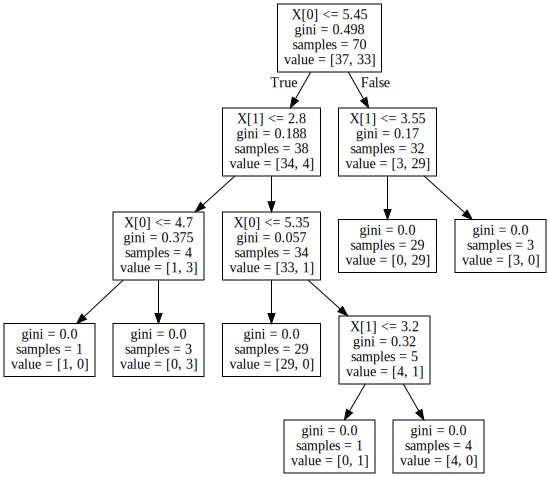

In [43]:
graphviz.Source(dot_graph)

----